# Regression between sea level height and the dangendorf wind proxies for cmip6 data


The regression analysis is executed using the average pressure over the positively and negatively correlated areas.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'historical'
model = 'Dangendorf'

#### Import and plot cmip6 sea level (zos) and pressure data historical

In [2]:
zos = imprt.import_cmip6_slh_data()

In [3]:
pres_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

In [4]:
zos

<xarray.Dataset>
Dimensions:  (station: 7, model: 28, time: 165)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * station  (station) object 'Vlissingen' 'Hoek v. Holland' ... 'Average'
Data variables:
    zos      (station, model, time) float64 -2.969 -0.9167 ... -3.951 -3.088

### Plot data

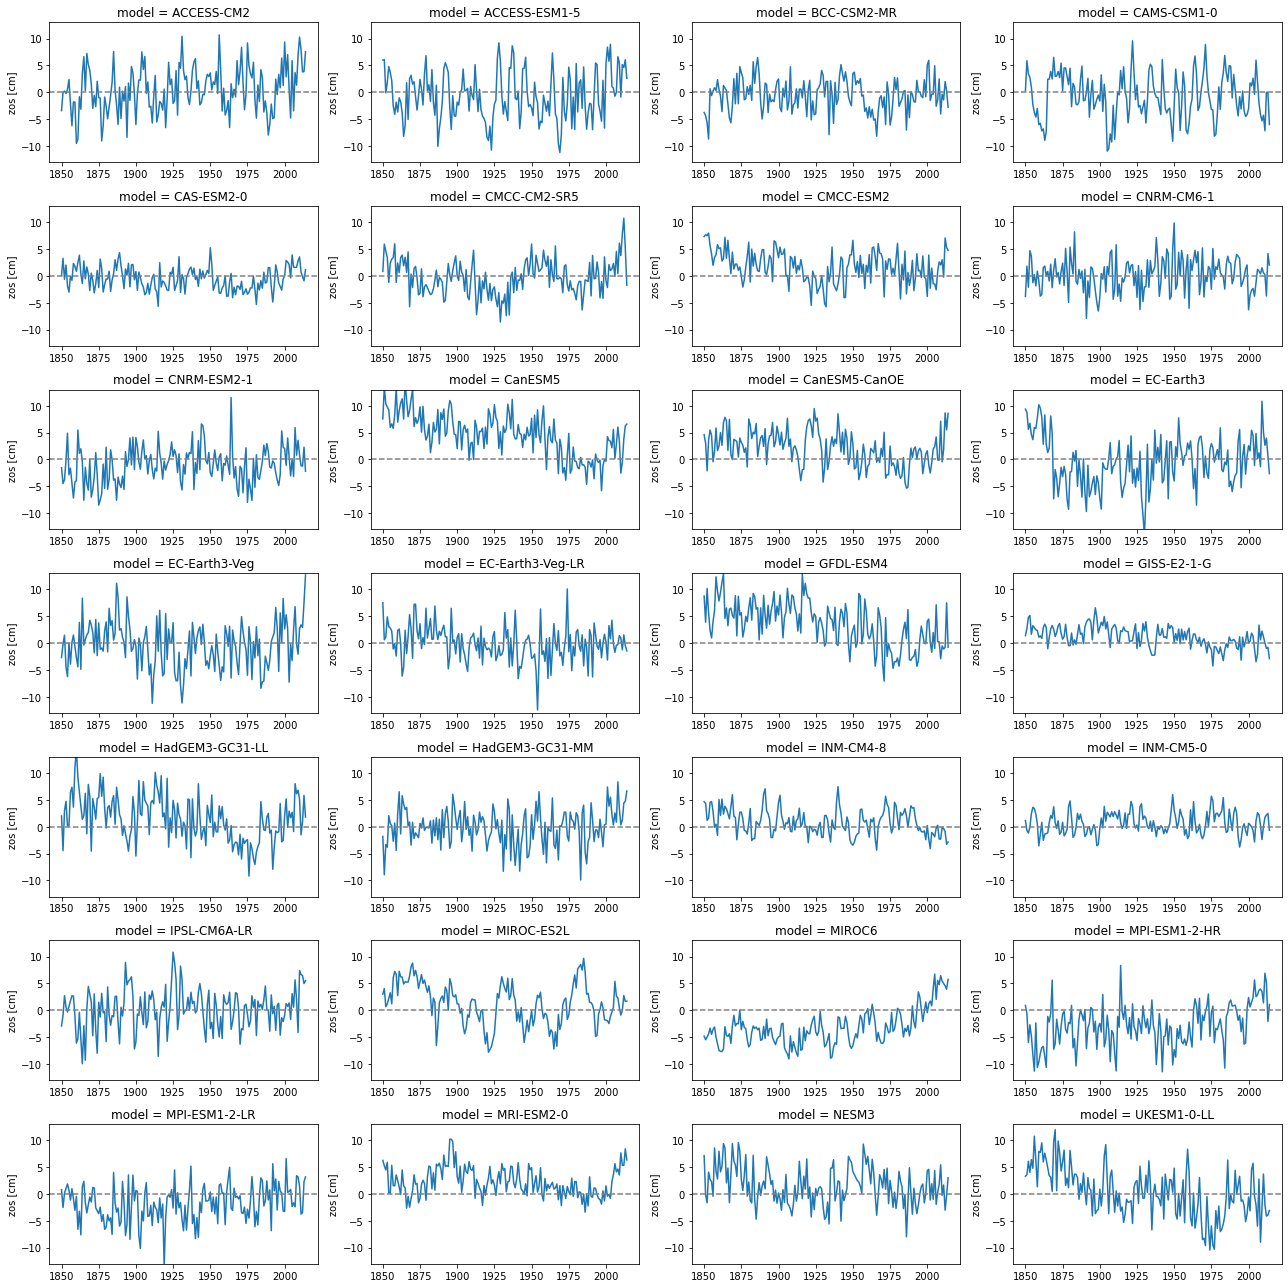

In [5]:
figs.plot_zos_data_per_model(zos, data_type)

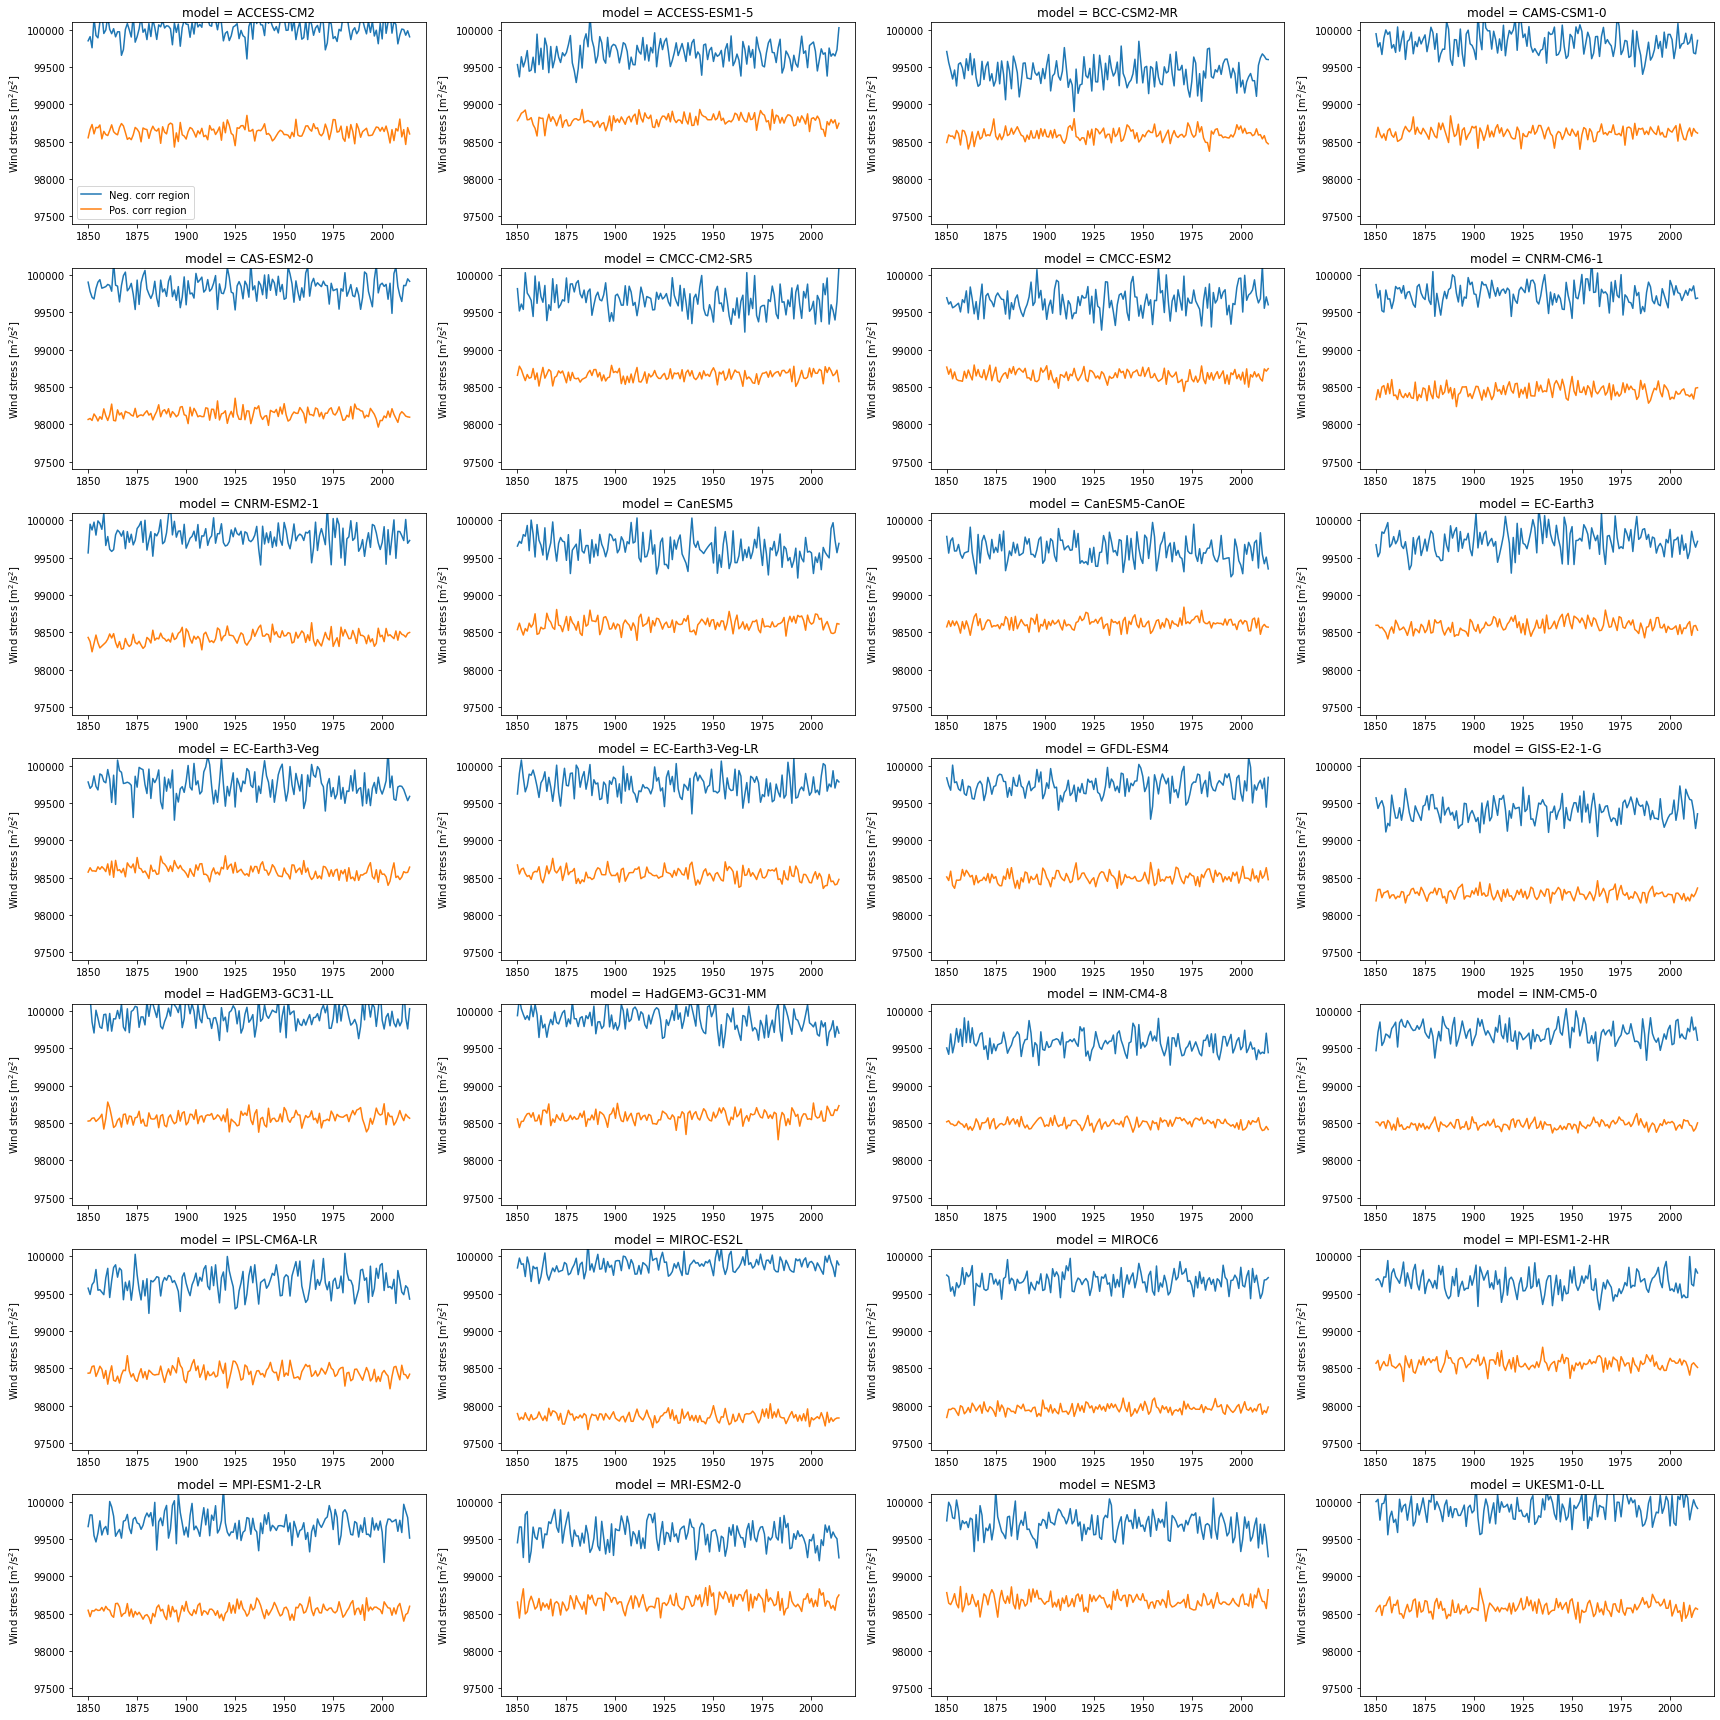

In [6]:
figs.plot_cmip6_wind_data_per_model(pres_data, model, data_type)

### Perform regression

In [7]:
results, timeseries, significance = regres.regression_cmip6(pres_data, zos, wind_model = model, data_type = data_type)

In [8]:
timeseries 

<xarray.Dataset>
Dimensions:          (model: 28, station: 7, time: 165)
Coordinates:
  * time             (time) int64 1850 1851 1852 1853 ... 2011 2012 2013 2014
  * station          (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model            (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
Data variables:
    neg_corr_region  (model, station, time) float64 1.681 1.104 ... -0.02466
    pos_corr_region  (model, station, time) float64 -0.4633 0.1623 ... -0.3264
    trend            (model, station, time) float64 -2.651 -2.619 ... -5.74
    total            (model, station, time) float64 -1.434 -1.353 ... -6.091
    wind_total       (model, station, time) float64 1.218 1.266 ... -0.3511

In [9]:
results

<xarray.Dataset>
Dimensions:          (model: 28, station: 7)
Coordinates:
  * station          (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model            (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
Data variables:
    r2               (model, station) float64 0.265 0.265 ... 0.6679 0.701
    r2_wind          (model, station) float64 0.157 0.157 ... 0.4416 0.3901
    r2_neg           (model, station) float64 0.1404 0.1404 ... 0.4079 0.3586
    r2_pos           (model, station) float64 0.09684 0.09684 ... 0.2439 0.2258
    rmse             (model, station) float64 3.185 3.185 3.252 ... 2.838 2.568
    constant         (model, station) float64 0.6209 0.6209 ... -0.6906 -0.3771
    neg_corr_region  (model, station) float64 -1.275 -1.275 ... -1.966 -1.589
    pos_corr_region  (model, station) float64 0.4285 0.4285 ... 1.366 1.348
    trend            (model, station) float64 1.54 1.54 1.464 ... -2.986 -3.334

In [10]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

,Negative corr region,Positive corr region,trend,total,wind total
model,,,,,
ACCESS-CM2,True,True,True,True,True
ACCESS-ESM1-5,True,True,False,True,True
BCC-CSM2-MR,True,True,False,True,True
CAMS-CSM1-0,True,True,False,True,True
CAS-ESM2-0,True,True,True,True,True
CMCC-CM2-SR5,True,True,False,True,True
CMCC-ESM2,True,True,True,True,True
CNRM-CM6-1,True,True,False,True,True
CNRM-ESM2-1,True,True,False,True,True


#### Plot regression results

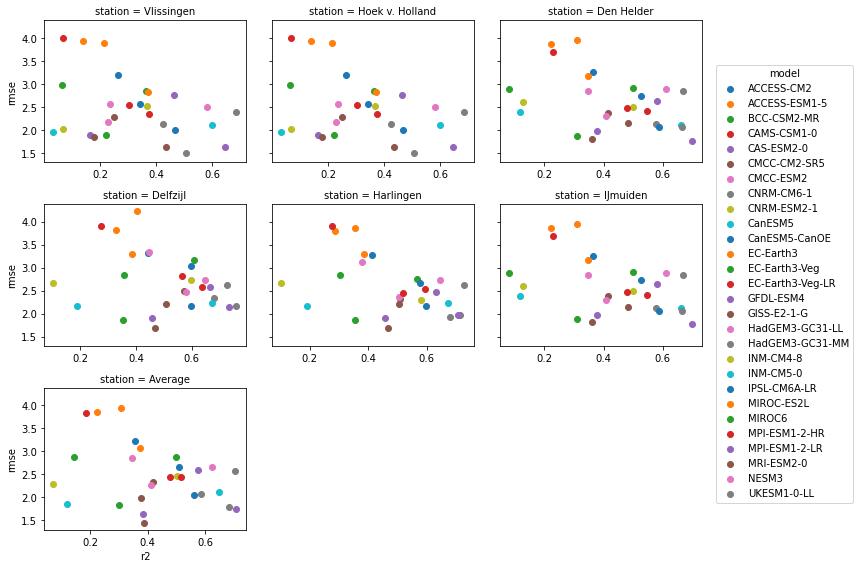

In [11]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

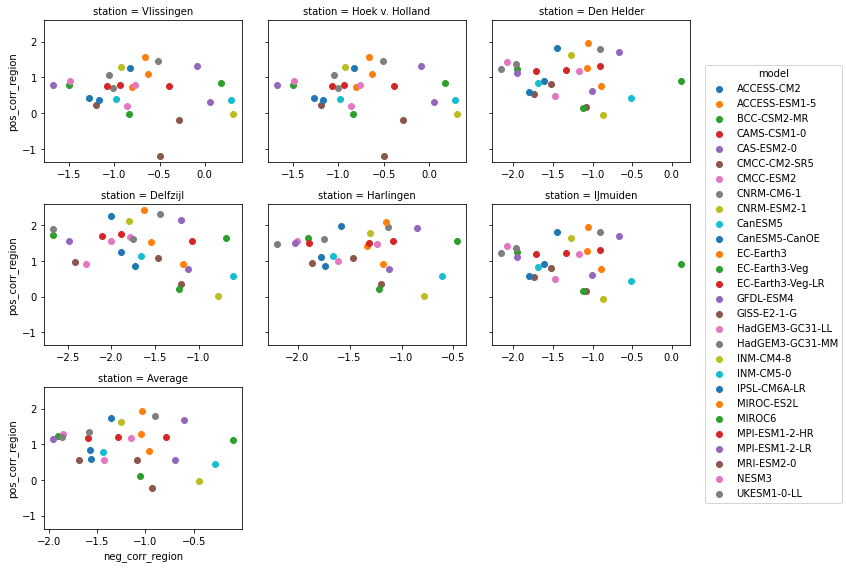

In [12]:
figs.plot_cmip6_two_variables(results, 'neg_corr_region', 'pos_corr_region', data_type)

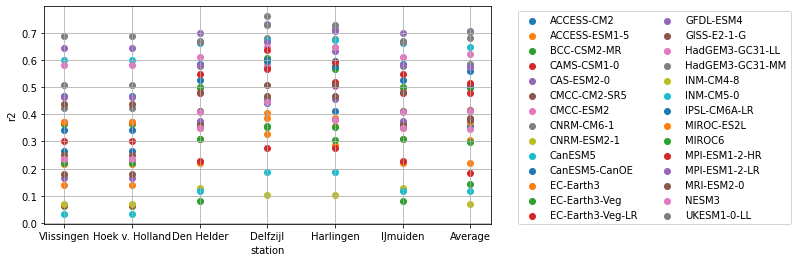

In [13]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type)

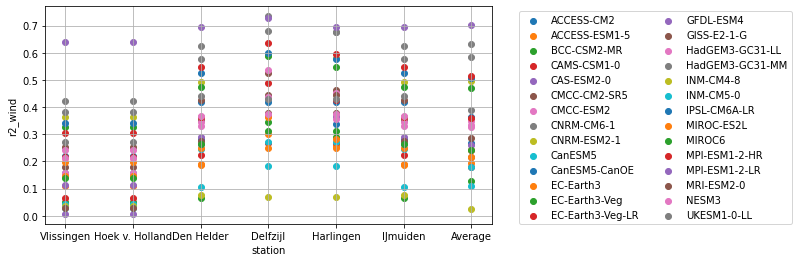

In [14]:
figs.plot_cmip6_result_per_station(results, 'r2_wind', data_type)

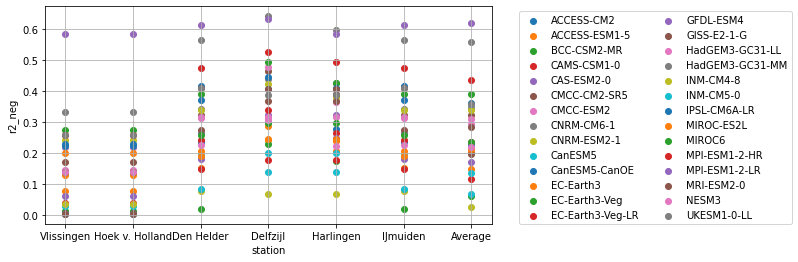

In [15]:
figs.plot_cmip6_result_per_station(results, 'r2_neg', data_type)

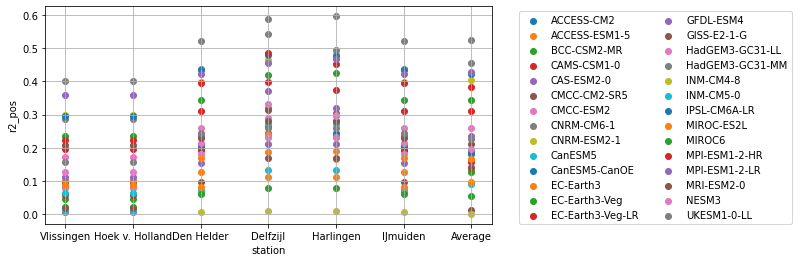

In [16]:
figs.plot_cmip6_result_per_station(results, 'r2_pos', data_type)

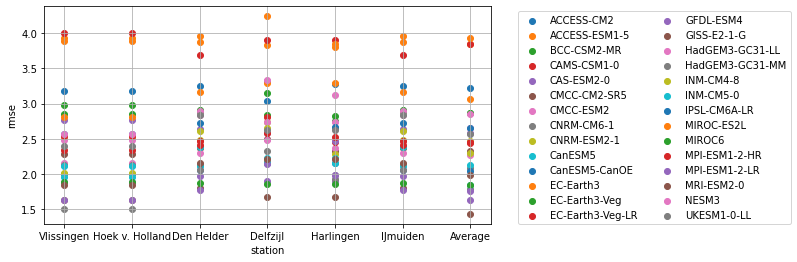

In [17]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

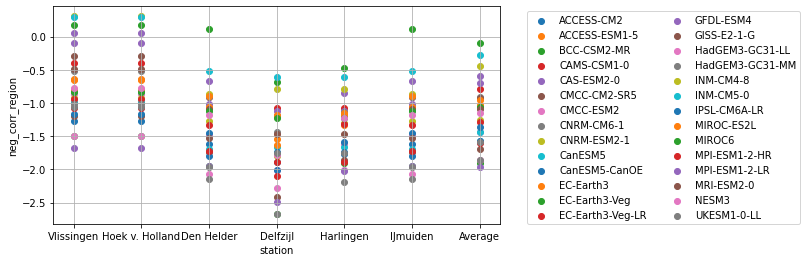

In [18]:
figs.plot_cmip6_result_per_station(results, 'neg_corr_region', data_type)

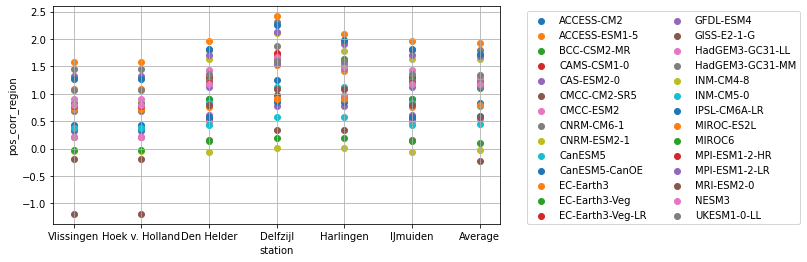

In [19]:
figs.plot_cmip6_result_per_station(results, 'pos_corr_region', data_type)

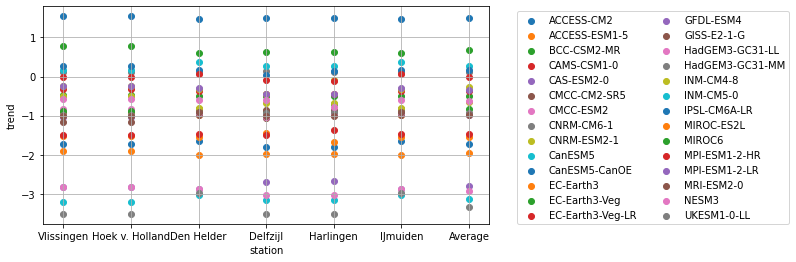

In [20]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type)

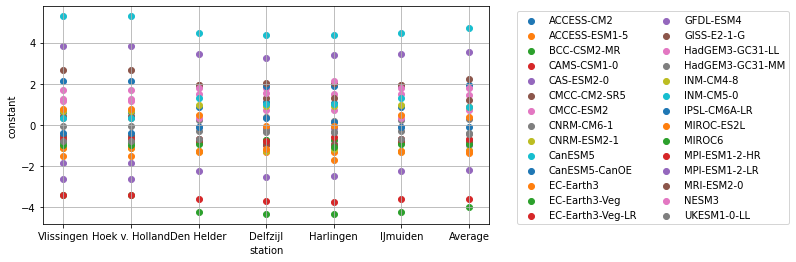

In [21]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

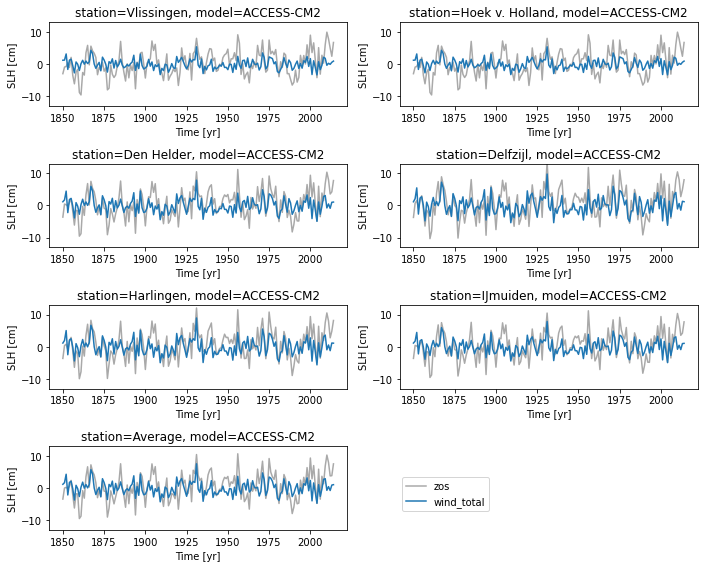

In [22]:
figs.plot_cmip6_timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['wind_total'])

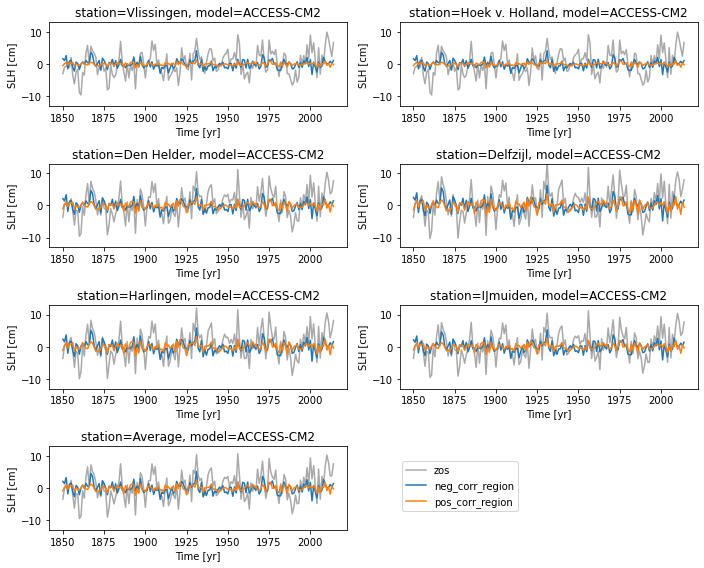

In [23]:
figs.plot_cmip6_timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['neg_corr_region', 'pos_corr_region'])

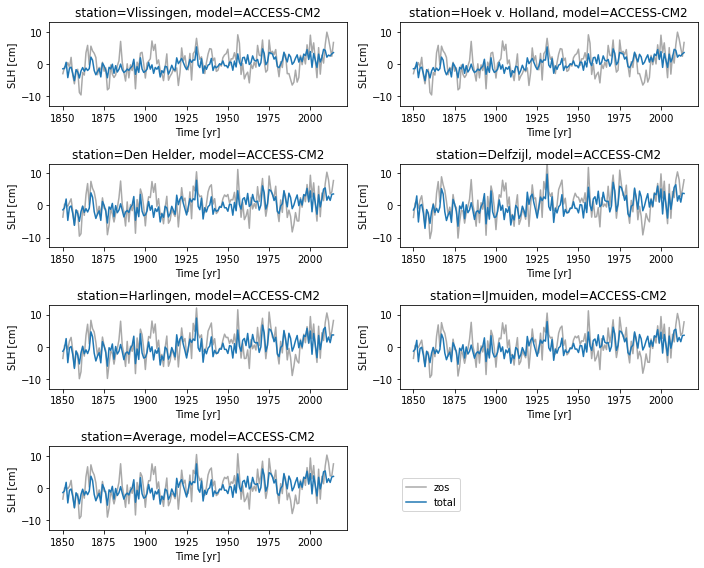

In [24]:
figs.plot_cmip6_timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['total'])

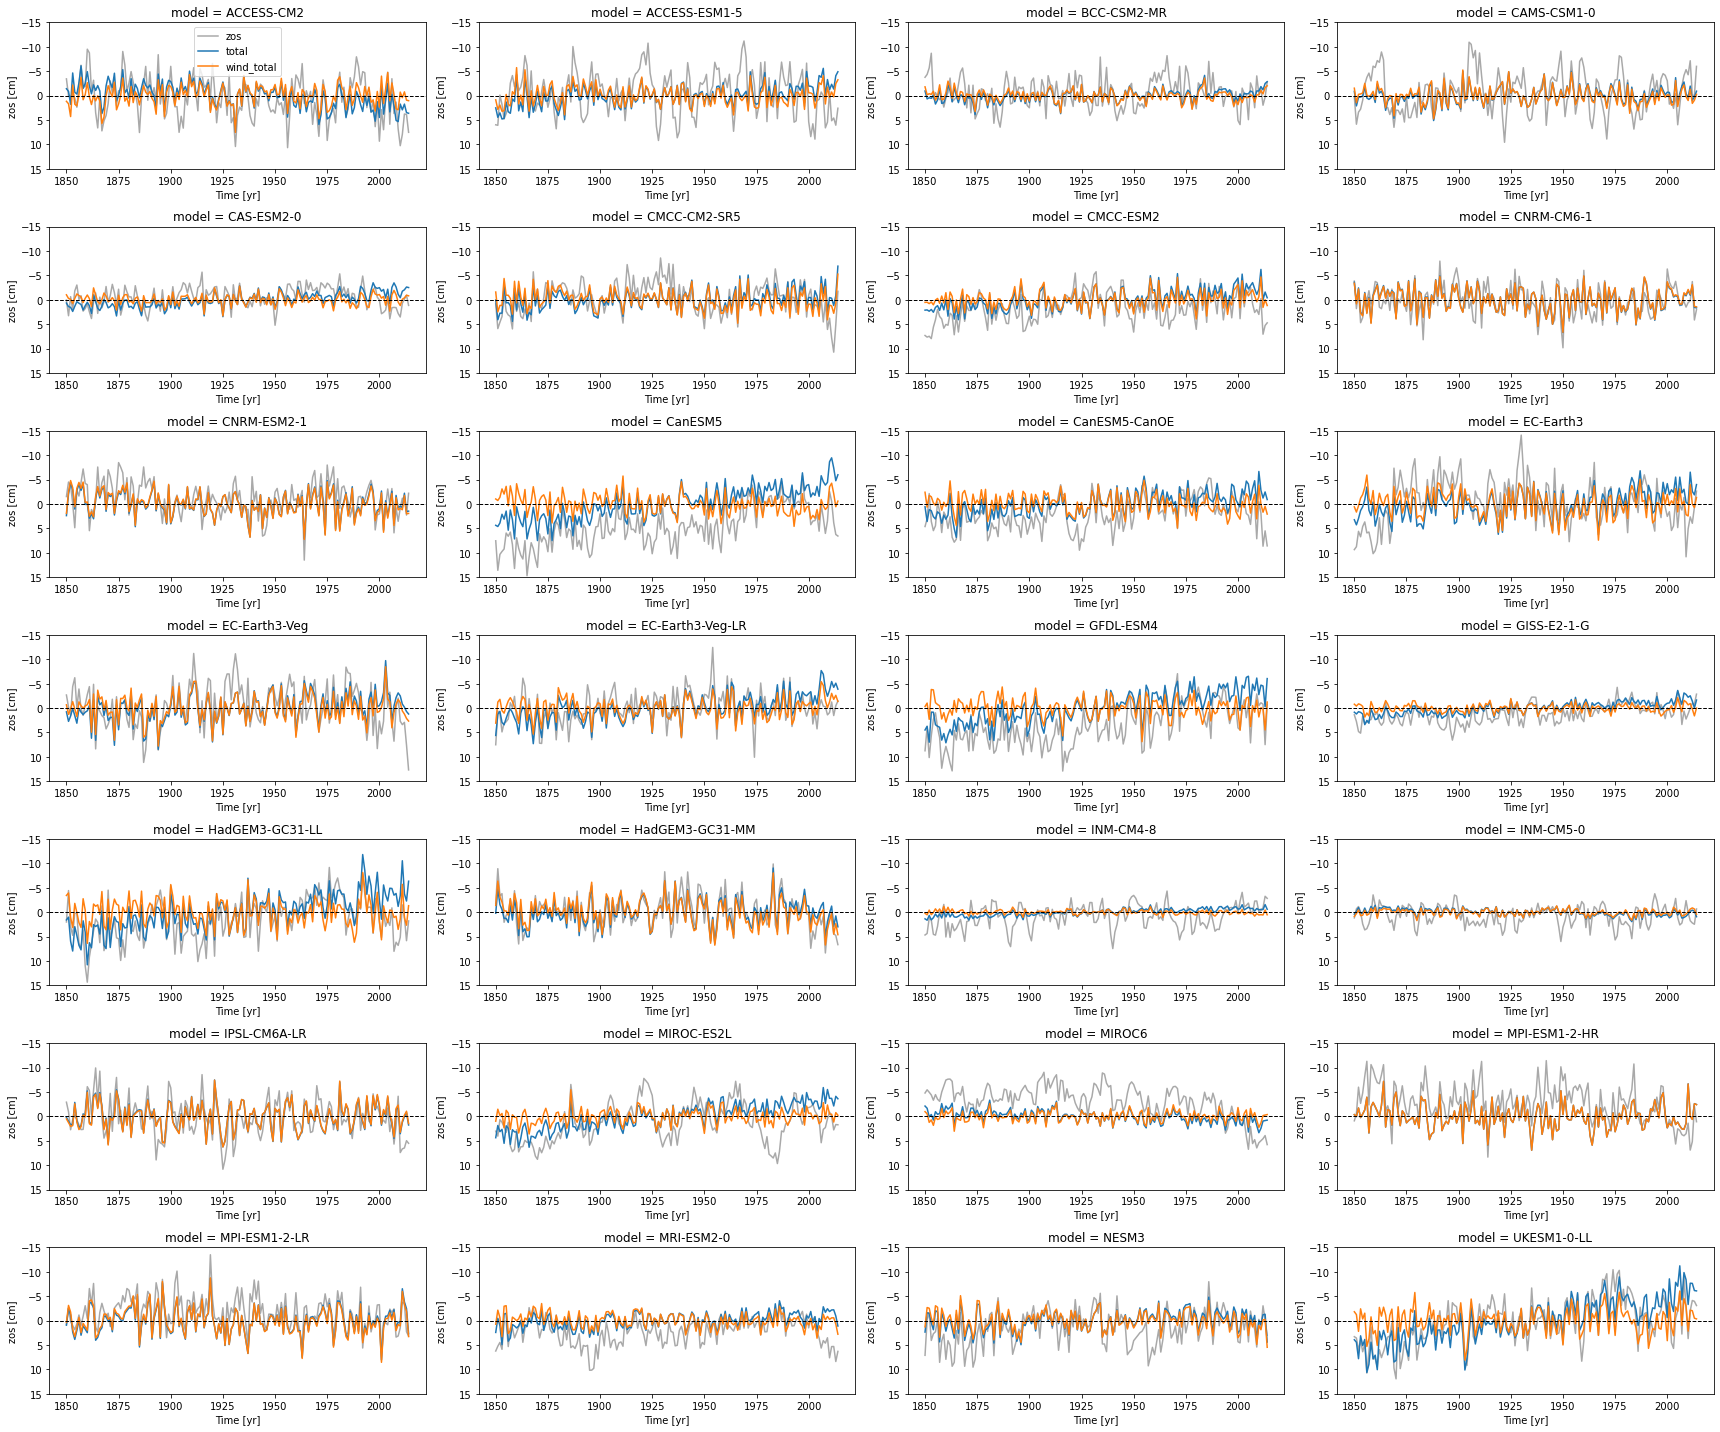

In [25]:
labels = ['total', 'wind_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

#### Plot trends

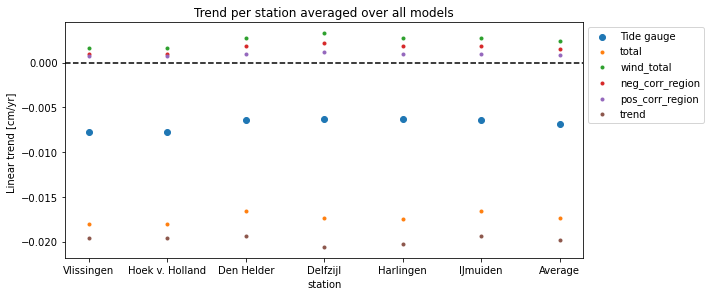

In [26]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'neg_corr_region', 'pos_corr_region', 'trend'], model, data_type, errorbar = False)

In [27]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df_trends = pd.DataFrame({'model': timeseries.model.values, 'trend':'', 'se':''})
df_trends = df_trends.set_index('model')

for model in timeseries.model.values:
    df_trends['trend'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).slope*10
    df_trends['se'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).stderr*10

df_trends

,trend,se
model,,
ACCESS-CM2,-0.022504,0.034731
ACCESS-ESM1-5,-0.00658,0.031843
BCC-CSM2-MR,0.016259,0.019223
CAMS-CSM1-0,0.021769,0.028953
CAS-ESM2-0,0.000258,0.017853
CMCC-CM2-SR5,0.077966,0.033146
CMCC-ESM2,-0.058942,0.028422
CNRM-CM6-1,0.027546,0.039608
CNRM-ESM2-1,0.142799,0.039755


In [28]:
df_trends.max()

trend    0.142799
se       0.044875
dtype: object

In [29]:
df_trends.min()

trend   -0.058942
se       0.007029
dtype: object

In [30]:
df_trends.std()

trend    0.053817
se       0.011071
dtype: float64

In [31]:
df_trends.mean()

trend    0.024619
se       0.031567
dtype: float64